# Colour segmentation of a boulder problem

In [1]:
from PIL import Image
from pillow_heif import register_heif_opener
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

In [2]:
# Import the sample image
register_heif_opener()
image = Image.open('./images/IMG_1263.HEIC')
np_img = np.asarray(image)

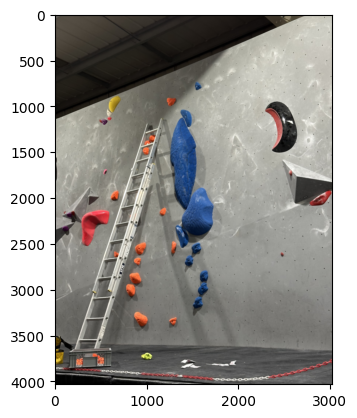

In [3]:
# Basic image processing
blur = cv.blur(np_img,(5,5))
blur0=cv.medianBlur(blur,5)
blur1= cv.GaussianBlur(blur0,(5,5),0)
blur2= cv.bilateralFilter(blur1,9,75,75)
plt.imshow(blur2)

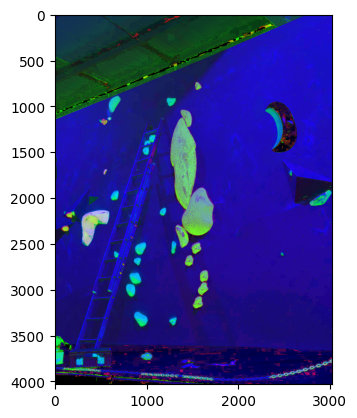

In [4]:
hsv = cv.cvtColor(np_img, cv.COLOR_RGB2HSV)

plt.imshow(hsv)

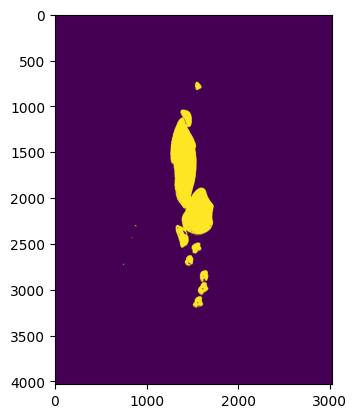

In [5]:
low_blue = np.array([60, 50, 40])
high_blue = np.array([118, 255, 255])
mask = cv.inRange(hsv, low_blue, high_blue)

plt.imshow(mask)

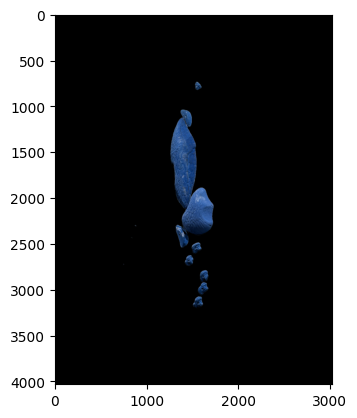

In [6]:
res = cv.bitwise_and(np_img,np_img, mask=mask)
plt.imshow(res)